Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
# Import needed libraries plus the Palmer Penguins dataset
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [2]:
# The variables "species", "island", and "sex" should be dummified
penguins = pd.get_dummies(penguins, columns=["species", "island", "sex"])
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,2007,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,2007,1,0,0,0,0,1,1,0
3,NaN,NaN,NaN,NaN,2007,1,0,0,0,0,1,0,0
4,36.7,19.3,193.0,3450.0,2007,1,0,0,0,0,1,1,0


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [3]:
# First, the NaN's in both columns need to be dealt with. I'll drop them since there aren't that many
penguins = penguins.dropna()

In [4]:
# Simple linear regression model
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

y = penguins["bill_depth_mm"]
X = penguins[["bill_length_mm"]]
simple_lr_fit = lr.fit(X, y)
y_pred_simple_lr = simple_lr_fit.predict(X)

In [5]:
# Quadratic (degree 2) polynomial regression model
X = penguins[["bill_length_mm"]]**2
quad_lr_fit = lr.fit(X, y)
y_pred_quad_lr = quad_lr_fit.predict(X)

In [6]:
# Cubic (degree 3) polynomial regression model
X = penguins[["bill_length_mm"]]**3
cube_lr_fit = lr.fit(X, y)
y_pred_cube_lr = cube_lr_fit.predict(X)

In [7]:
# Degree 10 polynomial regression model
X = penguins[["bill_length_mm"]]**10
deg_10_lr_fit = lr.fit(X, y)
y_pred_deg_10_lr = deg_10_lr_fit.predict(X)

In [8]:
all_preds = pd.DataFrame({
    "deg_1": y_pred_simple_lr,
    "deg_2": y_pred_quad_lr,
    "deg_3": y_pred_cube_lr,
    "deg_10": y_pred_deg_10_lr
})

all_preds.head()

,deg_1,deg_2,deg_3,deg_10
0,17.561136,17.536531,17.503260,17.219333
1,17.527128,17.508358,17.480664,17.217822
2,17.459111,17.451151,17.434080,17.214354
3,17.765187,17.699549,17.629390,17.225953
4,17.544132,17.522480,17.492019,17.218595


In [9]:
# Now, for the purposes of visualization, let's melt the predictions dataset
predictions_long = all_preds.melt(var_name="degree", value_name="preds").reset_index(drop=True)
predictions_long["bill_length_mm"] = pd.concat([penguins["bill_length_mm"]] * len(all_preds.columns), ignore_index=True)

# Sort the degrees in order as categories so they appear in this order on the plot (otherwise it will go from deg_1 to deg_10 since that's the alphabetical way)
predictions_long["degree"] = pd.Categorical(predictions_long["degree"], categories=["deg_1", "deg_2", "deg_3", "deg_10"], ordered=True)

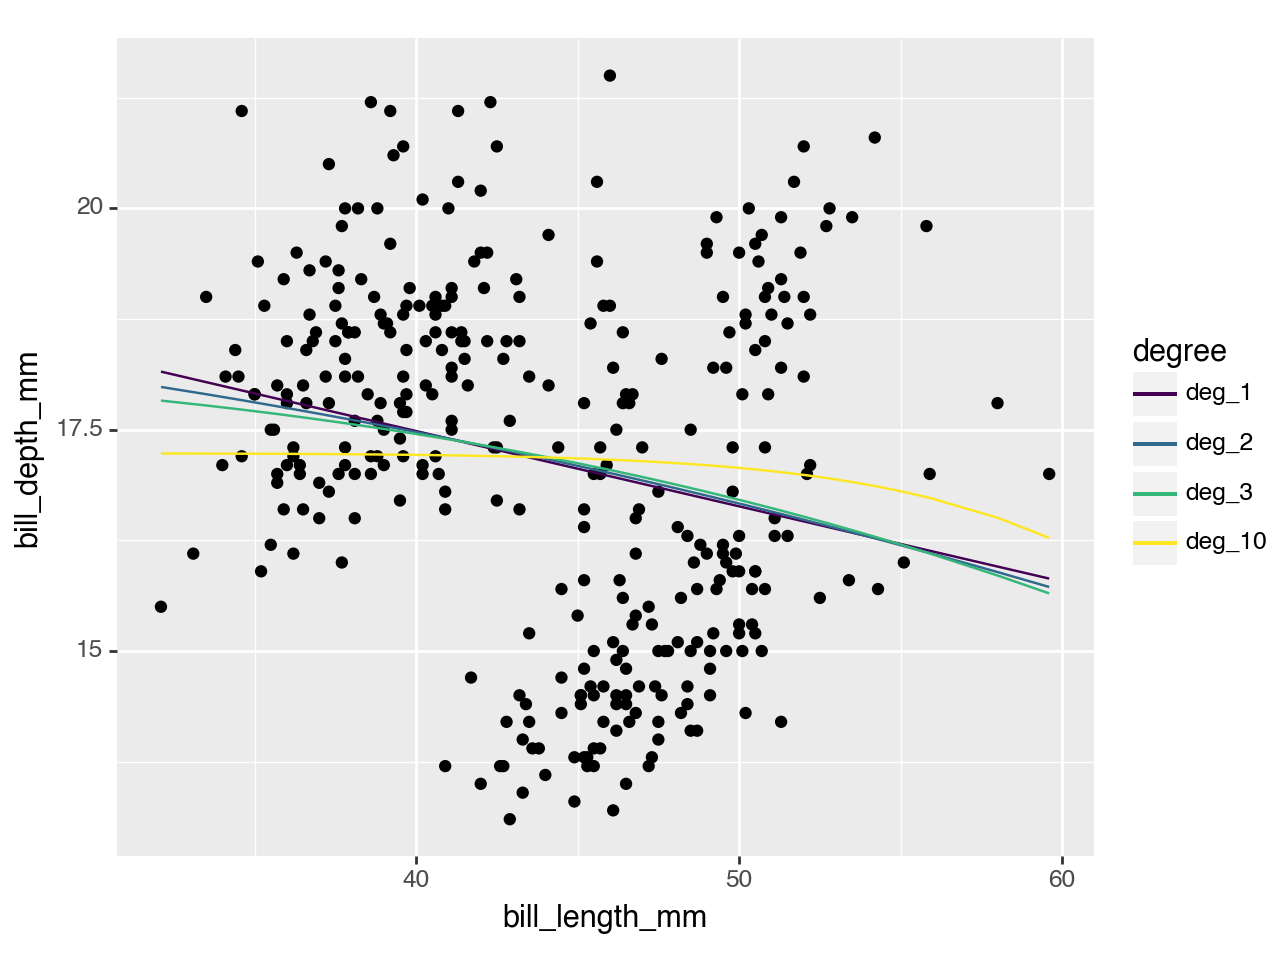

<Figure Size: (640 x 480)>

In [10]:
# Plot fitted models on scatterplot
from plotnine import *

(ggplot(penguins, aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_point()
    + geom_line(predictions_long, aes(x="bill_length_mm", y="preds", color="degree"))
)


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?



Based on the visualization, it would appear that the simple linear regression model (degree 1) is underfitting the data because it just appears as a straight line, as if the relationship between bill length and bill depth were perfectly linear when the scatterplot shows that that is clearly not the case.

If any of the models are overfit, it is most likely the one with the degree 10 polynomial. It curves way more extremely on the plot than the other three, and it looks like it's trying to capture the outliers towards the end of the x-axis while the other three models are leaving those alone.

The degree 2 and degree 3 polynomial regression models seem to fit the data best, as they mostly follow a linear path while still curving a bit to allow for some variation. This indicates that these two models have aimed to capture the overall pattern instead of trying to account for every single data point. If I had to pick one, though, I would say the degree 3 polynomial model is probably best simply because it seems to deviate a bit more from the strictly linear path than the degree 2 model does.
